In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats # for cdfs of distributions we will use
%config InlineBackend.figure_format = "svg"
#from pymc3 import *


In [ ]:
stats.norm.cdf(7, loc=5, scale=2)

0.5

# Normal probabilities (from last week)

In [ ]:
y = np.random.normal(5,2,10000)
len(y[y>7])/len(y)



0.1568

In [ ]:

# cdf(x,mu,sigma) compute P(Y<x), and P(Y<x) = 1-P(Y<x)
1 - stats.norm.cdf(7, 5,2)

0.15865525393145707

In [ ]:
# we will use that P(Y>3,Y<7) = P(Y>3) - P(Y>7)
plessthan7 = stats.norm.cdf(7, loc=5, scale=2)
pbetween37 = 1 - stats.norm.cdf(3, loc=5, scale=2) - (1-plessthan7)
pbetween37/plessthan7


0.8114265826549397

# The central limit Theorem

## Example 1




In [ ]:
import scipy.stats as sps
N = 100 # number of terms in sum
n_reps = 1000 # number of monte carlo samples
q = 0.6

y = np.random.binomial(N,q,n_reps)
p_binom= len(y[y<N/2])/len(y)
z = np.sqrt(N)*(1-2*q)/np.sqrt(q*(1-q))/2
p_clt = sps.norm.cdf(z,0,1)
print(p_binom)
print(p_clt)

0.022
0.02061341666858185


<ipython-input-137-add42f48f2d4>:8: RuntimeWarning: divide by zero encountered in double_scalars
  z = np.sqrt(N)*(1-2*q)/np.sqrt(q*(1-q))/2


Text(0.5, 0, '$q$')

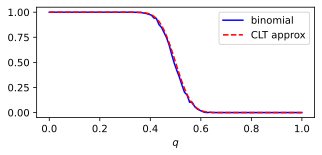

In [ ]:

fig,ax = plt.subplots(figsize=(5,2),sharex=True)
q_range = np.linspace(0,1,100)

p_binoms = []
p_clts = []
for q in q_range:
  y = np.random.binomial(N,q,n_reps)
  z = np.sqrt(N)*(1-2*q)/np.sqrt(q*(1-q))/2
  p_binoms.append(len(y[y<N/2])/len(y))
  p_clts.append(sps.norm.cdf(z,0,1))
p_binoms = np.array(p_binoms)
p_clts = np.array(p_clts)
ax.plot(q_range,p_binoms,"b-",label="binomial")
ax.plot(q_range,p_clts,"r--",label="CLT approx")
ax.legend(frameon=True)
ax.set_xlabel("$q$")

<ipython-input-114-420c06a69163>:11: RuntimeWarning: divide by zero encountered in double_scalars
  z = np.sqrt(N)*(1-2*q)/np.sqrt(q*(1-q))/2
<ipython-input-114-420c06a69163>:16: RuntimeWarning: invalid value encountered in divide
  ax.plot(q_range,abs(p_binoms/p_clts-1),label="relative error")


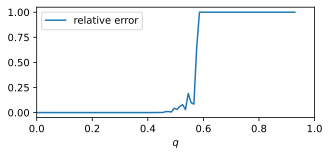

In [ ]:
N = 500 # number of terms in sum
n_reps = 10000 # number of monte carlo samples

fig,ax = plt.subplots(figsize=(5,2),sharex=True)
q_range = np.linspace(0,1,100)

p_binoms = []
p_clts = []
for q in q_range:
  y = np.random.binomial(N,q,n_reps)
  z = np.sqrt(N)*(1-2*q)/np.sqrt(q*(1-q))/2
  p_binoms.append(len(y[y<N/2])/len(y))
  p_clts.append(sps.norm.cdf(z,0,1))
p_binoms = np.array(p_binoms)
p_clts = np.array(p_clts)
ax.plot(q_range,abs(p_binoms/p_clts-1),label="relative error")
ax.legend(frameon=True)
ax.set_xlim([0,1])
ax.set_xlabel("$q$");

Text(0, 0.5, ' relative error')

<Figure size 640x480 with 0 Axes>

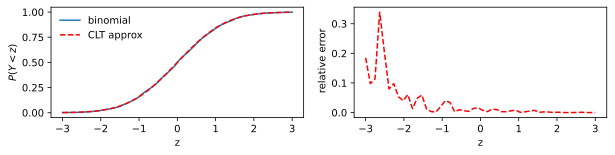

In [ ]:

plt.tight_layout()
N = 5000
q = 0.4


fig,axs = plt.subplots(figsize=(10,2),ncols=2,sharex=True)
ax = axs[0]
k_range = range(1,N)
y = np.random.binomial(N,q,5000)
y_scaled = (y - q*N)/np.sqrt(N*q*(1-q))
z_range= np.linspace(-3,3,50)
ax.plot(z_range,[len(y_scaled[y_scaled<z])/len(y_scaled) for z in z_range],label="binomial")
ax.plot(z_range,[sps.norm.cdf(z,0,1) for z in z_range],"r--",label="CLT approx")
ax.set_xlabel("z")
ax.set_ylabel("$P(Y<z)$")
ax.legend(frameon=False)


ax = axs[1]
k_range = range(1,N)
ax.plot(z_range,[abs((len(y_scaled[y_scaled<z])/len(y_scaled))/sps.norm.cdf(z,0,1)-1) for z in z_range],"r--")
ax.set_xlabel("z")
ax.set_ylabel(" relative error")


## Example 2



Text(0.5, 0, '$\\tau$')

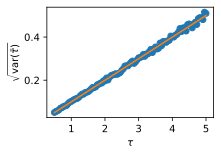

In [ ]:
t_range = np.linspace(0.5,5,100)
# the inner for loop computes many replicates of $\hat{\tau}$ and then we take the variance
vars = np.array([np.var([np.mean(np.random.exponential(t,100)) for k in range(1000)]) for t in t_range])

fig, ax= plt.subplots(figsize=(3,2))
ax.plot(t_range,np.sqrt(vars),"o")
ax.plot(t_range,t_range/10)
ax.set_ylabel("$\\sqrt{{\\rm var}(\\bar{\\tau})}$")
ax.set_xlabel("$\\tau$")

# Regression, covariance and correlation

In [ ]:
mux = 1
sigmax = 2
beta0 = 1
beta1 = 2
sigmaxy = 1.3
num_reps = 1000
x = np.random.normal(mux,sigmax,num_reps)
y = np.random.normal(beta1*x + beta0,sigmaxy,num_reps)

In [ ]:
np.cov(x,y)/

# Example 3 (marketing data)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")

Text(0, 0.5, 'Sales budget')

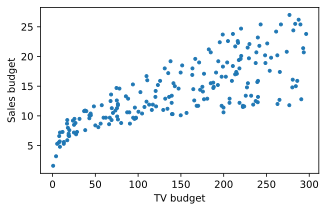

In [ ]:
x = data.TV.values
y = data.Sales.values

fig, ax =plt.subplots(figsize=(5,3))
ax.plot(x,y,".")
ax.set_xlabel("TV budget")
ax.set_ylabel("Sales budget")

Text(0, 0.5, 'Sales  (units x 1000)')

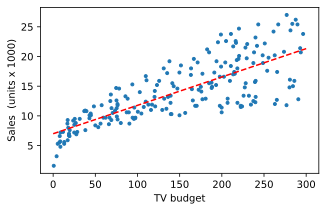

In [ ]:
beta1_fit = np.cov(x,y)[0,1]/np.var(x)
beta0_fit = np.mean(y) - beta1_fit*np.mean(x)
fig, ax =plt.subplots(figsize=(5,3))


ax.plot(x,y,".")

x_range = np.linspace(0,300,300)
ax.plot(x_range,x_range*beta1_fit+beta0_fit,"r--")
ax.set_xlabel("TV budget")
ax.set_ylabel("Sales  (units x 1000)")
